#  Logistic Regression 

#  Credit Risk Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
cr = pd.read_csv("CreditRisk.csv")

In [4]:
cr.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
cr.Gender = cr.Gender.fillna("Male")
cr.Married = cr.Married.fillna("No")
cr.Dependents = cr.Dependents.fillna(0)
cr.Self_Employed = cr.Self_Employed.fillna("No")
cr.LoanAmount = cr.LoanAmount.fillna(cr.LoanAmount.mean())
cr.Loan_Amount_Term = cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.mean())
cr.Credit_History = cr.Credit_History.fillna(0)

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
cr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,Y


In [8]:

print(cr['Property_Area'].value_counts())

Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64


In [9]:
cr.Gender = le.fit_transform(cr.Gender)
cr.Married = le.fit_transform(cr.Married)
cr.Education = le.fit_transform(cr.Education)
cr.Self_Employed = le.fit_transform(cr.Self_Employed)
cr.Property_Area = le.fit_transform(cr.Property_Area)

In [10]:
print(cr['Property_Area'].value_counts())

1    349
2    342
0    290
Name: Property_Area, dtype: int64


In [11]:
cr.Loan_Status = cr.Loan_Status.replace({ "Y" :1 , "N" :0 })

In [12]:
cr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,0,0,5849,0.0,142.51153,360.0,1.0,2,1
1,LP001003,1,1,1.0,0,0,4583,1508.0,128.00000,360.0,1.0,0,0
2,LP001005,1,1,0.0,0,1,3000,0.0,66.00000,360.0,1.0,2,1
3,LP001006,1,1,0.0,1,0,2583,2358.0,120.00000,360.0,1.0,2,1
4,LP001008,1,0,0.0,0,0,6000,0.0,141.00000,360.0,1.0,2,1


In [13]:
cr.shape

(981, 13)

In [14]:
cr_x = cr.iloc[ : , 1:12]
cr_y = cr.iloc[ : , 12]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
cr_x_train, cr_x_test, cr_y_train, cr_y_test = train_test_split(cr_x,cr_y, test_size = 0.2, random_state = 555)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
logmodel = LogisticRegression()

In [19]:
logmodel.fit(cr_x_train, cr_y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
pred = logmodel.predict(cr_x_test)

In [21]:
from sklearn.metrics import confusion_matrix

tab = confusion_matrix(pred,cr_y_test )

In [22]:
acc = tab.diagonal().sum() / tab.sum()*100
acc

78.1725888324873

In [23]:
from sklearn.metrics import classification_report
print(classification_report(pred , cr_y_test))

              precision    recall  f1-score   support

           0       0.54      0.69      0.61        48
           1       0.89      0.81      0.85       149

    accuracy                           0.78       197
   macro avg       0.72      0.75      0.73       197
weighted avg       0.80      0.78      0.79       197



In [24]:
pred_prob = logmodel.predict_proba(cr_x_test)

In [25]:
pred_prob = pd.DataFrame(pred_prob)

In [26]:
# I want to target the customers which are good cust. or cost. with highest prob
# A ( 0.05  , 0.95)
# B ( 0.2  , 0.8)
# C ( 0.45 , 0.55)
# finally they all are marked under class 1 



In [27]:
pred_prob_full = logmodel.predict_proba(cr_x)
pred_prob_full = pd.DataFrame(pred_prob_full)

In [28]:
df1 = pd.DataFrame({"Loan_ID" : cr.Loan_ID, "Probality": pred_prob_full.iloc[ : , 1] })

In [29]:
df1 = df1.sort_values("Probality", ascending = False)

In [30]:
# AUROC
from sklearn.metrics import roc_auc_score, roc_curve

In [31]:
pred = logmodel.predict(cr_x_test)

In [32]:
roc_auc = roc_auc_score(pred, cr_y_test)
roc_auc

0.7497902684563759

In [33]:
# lets Plot the curve
pred_prob = logmodel.predict_proba(cr_x_test)
pred_prob = pd.DataFrame(pred_prob)

In [34]:
fpr, tpr, threshold = roc_curve( cr_y_test ,  pred_prob.iloc[ : , 1] )

Text(0.4, 0.6, 'Area under curve is 0.749')

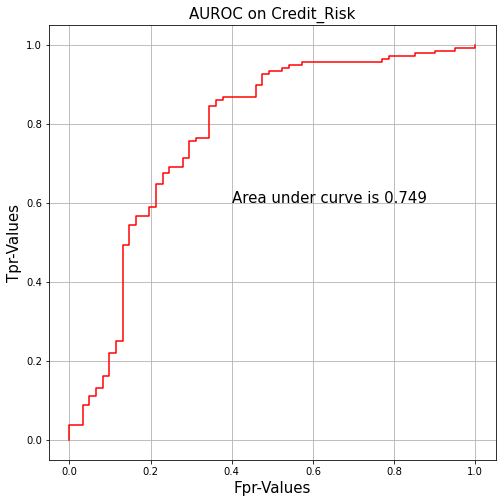

In [35]:
plt.figure(figsize = (8,8))
plt.plot(fpr, tpr, color = "r")
plt.xlabel("Fpr-Values", size = 15)
plt.ylabel("Tpr-Values", size = 15 )
plt.grid()
plt.title("AUROC on Credit_Risk", size = 15)
plt.text(x= 0.4, y = 0.6 , s = "Area under curve is 0.749", size = 15)

# Patient_with_abnormal_bloodpressure Logistic Reg

In [36]:
pabp = pd.read_csv("Patient_with_abnormal_bloodpressure.csv")

In [37]:
pabp.isnull().sum()

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

In [38]:
pabp.Genetic_Pedigree_Coefficient = pabp.Genetic_Pedigree_Coefficient.fillna(pabp.Genetic_Pedigree_Coefficient.mean())
pabp.Pregnancy = pabp.Pregnancy.fillna(0)
pabp.alcohol_consumption_per_day = pabp.alcohol_consumption_per_day.fillna(pabp.alcohol_consumption_per_day.mean())

In [39]:
pabp.Blood_Pressure_Abnormality = pabp.Blood_Pressure_Abnormality.replace({ 1 :1 , 0 :0 })

In [40]:
pabp.head()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,251.008532,2,1,1
1,2,0,9.75,0.23,54,33,1,0.0,0,26106,25333,205.000000,3,0,0
2,3,1,10.79,0.91,70,49,0,0.0,0,9995,29465,67.000000,2,1,0
3,4,0,11.00,0.43,71,50,0,0.0,0,10635,7439,242.000000,1,1,0
4,5,1,14.17,0.83,52,19,0,0.0,0,15619,49644,397.000000,2,0,0


In [41]:
pabp.shape

(2000, 15)

In [42]:
pabp_x = pabp.iloc[ : , 1:14]
pabp_y = pabp.iloc[ : , 1]

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
pabp_x_train, pabp_x_test, pabp_y_train, pabp_y_test = train_test_split(pabp_x,pabp_y, test_size = 0.2, random_state = 555)

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
logmodel = LogisticRegression()

In [47]:
logmodel.fit(pabp_x_train, pabp_y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
pabp_pred = logmodel.predict(pabp_x_test)

In [49]:
from sklearn.metrics import confusion_matrix

pabp_tab = confusion_matrix(pabp_pred,pabp_y_test )
pabp_tab

array([[128,  77],
       [ 72, 123]], dtype=int64)

In [50]:
pabp_acc = pabp_tab.diagonal().sum() / pabp_tab.sum()*100
pabp_acc

62.74999999999999

In [51]:
from sklearn.metrics import classification_report

print(classification_report(pabp_pred , pabp_y_test))

              precision    recall  f1-score   support

           0       0.64      0.62      0.63       205
           1       0.61      0.63      0.62       195

    accuracy                           0.63       400
   macro avg       0.63      0.63      0.63       400
weighted avg       0.63      0.63      0.63       400



In [52]:
pabp_pred_prob = logmodel.predict_proba(pabp_x_test)

In [53]:
pabp_pred_prob = pd.DataFrame(pabp_pred_prob)

In [54]:
pabp_pred_prob_full = logmodel.predict_proba(pabp_x)
pabp_pred_prob_full = pd.DataFrame(pabp_pred_prob_full)

In [55]:
pabp_df1 = pd.DataFrame({"Patient_Number" : pabp.Patient_Number, "Probality": pabp_pred_prob_full.iloc[ : , 1] })

In [56]:
pabp_df1 = pabp_df1.sort_values("Probality", ascending = False)

In [57]:
# AUROC
from sklearn.metrics import roc_auc_score, roc_curve

In [58]:
pabp_pred = logmodel.predict(pabp_x_test)

In [59]:
pabp_roc_auc = roc_auc_score(pabp_pred, pabp_y_test)
pabp_roc_auc

0.6275797373358349

In [60]:
# lets Plot the curve
pabp_pred_prob = logmodel.predict_proba(pabp_x_test)
pabp_pred_prob = pd.DataFrame(pabp_pred_prob)

In [61]:
fpr, tpr, threshold = roc_curve( pabp_y_test ,  pabp_pred_prob.iloc[ : , 1] )

Text(0.4, 0.6, 'Area under curve is 0.6275')

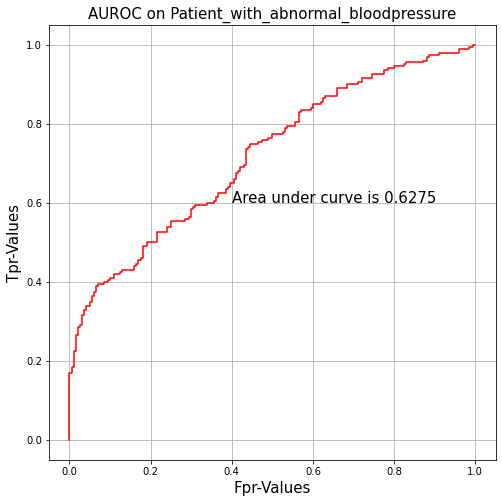

In [62]:
plt.figure(figsize = (8,8))
plt.plot(fpr, tpr, color = "r")
plt.xlabel("Fpr-Values", size = 15)
plt.ylabel("Tpr-Values", size = 15 )
plt.grid()
plt.title("AUROC on Patient_with_abnormal_bloodpressure", size = 15)
plt.text(x= 0.4, y = 0.6 , s = "Area under curve is 0.6275", size = 15)

#  Titanic  Logistic Reg

In [63]:
titanic = pd.read_excel("titanic3.xls")

In [64]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [65]:
titanic.shape

(1309, 14)

In [66]:
titanic.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [67]:
titanic.age = titanic.age.fillna(titanic.age.mean())
titanic.fare = titanic.fare.fillna(titanic.fare.mean())
titanic.body = titanic.body.fillna(titanic.body.mean())
titanic.embarked = titanic.embarked.fillna("C")


In [68]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [69]:
titanic.sex = le.fit_transform(titanic.sex)
titanic.embarked = le.fit_transform(titanic.embarked)

In [70]:
titanic.survived = titanic.survived.replace({ 1 :1 , 0 :0 })

In [71]:
titanic.shape

(1309, 14)

In [72]:
titanic_x = titanic.iloc[ : , [0,1,3,4,5,6,8,10,12] ]
titanic_y = titanic.iloc[ : , 1]

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
titanic_x_train, titanic_x_test, titanic_y_train, titanic_y_test = train_test_split(titanic_x,titanic_y, test_size = 0.2, random_state = 555)

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
logmodel = LogisticRegression()

In [77]:
logmodel.fit(titanic_x_train, titanic_y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [78]:
titanic_pred = logmodel.predict(titanic_x_test)

In [79]:
from sklearn.metrics import confusion_matrix

titanic_tab = confusion_matrix(titanic_pred,titanic_y_test )
titanic_tab

array([[172,   0],
       [  0,  90]], dtype=int64)

In [80]:
titanic_acc = titanic_tab.diagonal().sum() / titanic_tab.sum()*100
titanic_acc

100.0

In [81]:
from sklearn.metrics import classification_report

print(classification_report(titanic_pred , titanic_y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       172
           1       1.00      1.00      1.00        90

    accuracy                           1.00       262
   macro avg       1.00      1.00      1.00       262
weighted avg       1.00      1.00      1.00       262



In [82]:
titanic_pred_prob = logmodel.predict_proba(titanic_x_test)

In [83]:
titanic_pred_prob = pd.DataFrame(titanic_pred_prob)

In [84]:
titanic_pred_prob_full = logmodel.predict_proba(titanic_x)
titanic_pred_prob_full = pd.DataFrame(titanic_pred_prob_full)

In [85]:
titanic_df1 = pd.DataFrame({"Name" : titanic.name, "Probality": titanic_pred_prob_full.iloc[ : , 1] })

In [86]:
titanic_df1 = titanic_df1.sort_values("Probality", ascending = False)

In [87]:
# AUROC
from sklearn.metrics import roc_auc_score, roc_curve

In [88]:
titanic_pred = logmodel.predict(titanic_x_test)

In [89]:
titanic_roc_auc = roc_auc_score(titanic_pred, titanic_y_test)
titanic_roc_auc

1.0

In [90]:
# lets Plot the curve
titanic_pred_prob = logmodel.predict_proba(titanic_x_test)
titanic_pred_prob = pd.DataFrame(titanic_pred_prob)

In [91]:
fpr, tpr, threshold = roc_curve( titanic_y_test ,  titanic_pred_prob.iloc[ : , 1] )

Text(0.4, 0.6, 'Area under curve is 1')

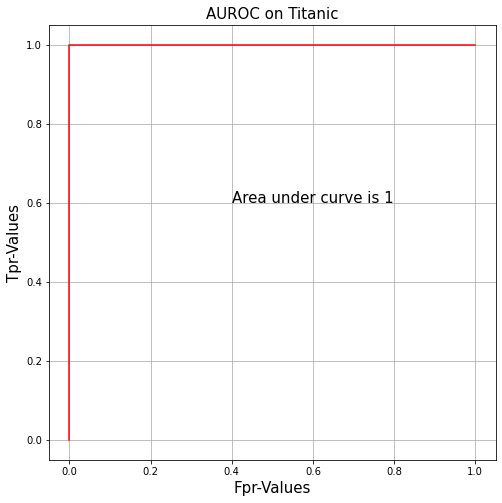

In [92]:
plt.figure(figsize = (8,8))
plt.plot(fpr, tpr, color = "r")
plt.xlabel("Fpr-Values", size = 15)
plt.ylabel("Tpr-Values", size = 15 )
plt.grid()
plt.title("AUROC on Titanic", size = 15)
plt.text(x= 0.4, y = 0.6 , s = "Area under curve is 1", size = 15)